# **Table of Contents**
* [Describe](#section_1)
* [Data type convert](#section_2)
* [Mean , Median , Mode](#section_3)
* [Quantile](#section_4)
* [Var , SD , MAD](#section_5)
* [Skewness , Kurtosis](#section_6)
* [Correlation , Covariance](#section_7)
* [Label Encode](#section_8)
* [One-hot Encode](#section_9)
* [Scaling](#section_10)
* [Transformation](#section_11)
* [Graphical Analysis](#section_12)
* [Outliers](#section_13)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import scipy.stats       as stats

import warnings
warnings.simplefilter ('ignore')

In [2]:
df = sns.load_dataset ('tips')       

df.sample (5)

,total_bill,tip,sex,smoker,day,time,size
200,18.71,4.00,Male,Yes,Thur,Lunch,3
157,25.00,3.75,Female,No,Sun,Dinner,4
105,15.36,1.64,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


<a id='section_1'></a>
# 1. **Describe**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.describe (include = 'category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [6]:
# df.describe  ( include = ['int64','float64'] )

# df.describe  ( include = 'O'        )
# df.describe  ( include =  np.object )

<a id='section_2'></a>
# 2. **Data type convert**

### **Viewing**

In [7]:
df.dtypes.value_counts()

float64     2
category    1
int64       1
category    1
category    1
category    1
dtype: int64

### **Separating out**

**Method 1**

In [9]:
cat_cols  =  list ( df  .select_dtypes (include=['category'])  .columns)

In [10]:
num_cols  =  [i    for i in df.columns    if i not in cat_cols]
num_cols

['total_bill', 'tip', 'size']

**Method 2**

In [11]:
df_num   =   df.select_dtypes   (include = [np.number])
df_cat   =   df.select_dtypes   (exclude = [np.number])    # include=['Object']

**Method 3**

In [12]:
df_cat   =   df [['sex','day']]
df_num   =   df [['total_bill','tip','size']]

### **Conversion** 

In [13]:
df1 = pd.DataFrame ()

df1 ['size1']   =   df ['size']          .astype (float)
df1 ['size2']   =   df ['size']          .astype ('category')
df1 ['size3']   =   df ['size']          .astype (object)

In [14]:
df1.sample(3)

,size1,size2,size3
109,2.0,2,2
107,2.0,2,2
121,2.0,2,2


<a id='section_3'></a>
# 3. **Mean , Median , Mode**

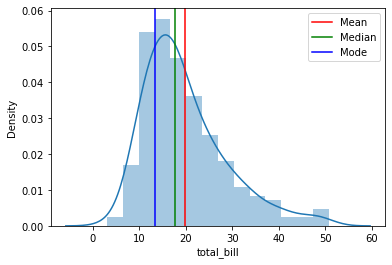

In [15]:
mean   =  df ['total_bill'].mean()
median =  df ['total_bill'].median()
mode   =  df ['total_bill'].mode()        # returns a series coz there can be >1 modes... mode[0] to get 1st mode


sns.distplot  ( df ['total_bill'] ) 

plt.axvline  ( mean,    label='Mean',  color='r')
plt.axvline  ( median,  label='Median',color='g')
plt.axvline  ( mode[0], label='Mode',  color='b')

plt.legend() ;

<a id='section_4'></a>
# 4. **Quantile**

In [16]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


> Comments
    
    * Last 5 values sequentially  represent 5-point summary of data

In [17]:
q1  =  df ['total_bill'].quantile(0.25)
q2  =  df ['total_bill'].quantile(0.50)
q3  =  df ['total_bill'].quantile(0.75)

IQR = q3-q1
IQR

10.779999999999998

* Plotting Quantiles on distplot

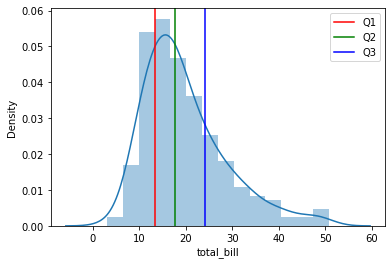

In [18]:
sns.distplot ( df['total_bill'] )

plt.axvline  (q1, label='Q1', color='r')
plt.axvline  (q2, label='Q2', color='g')
plt.axvline  (q3, label='Q3', color='b')

plt.legend() ;

* Plotting Quantiles on boxplot

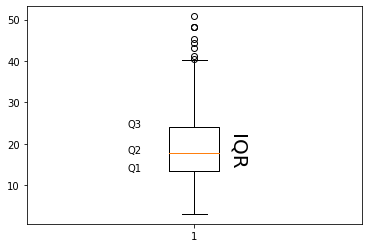

In [19]:
plt.boxplot ( df['total_bill'] )

plt.text ( 0.8 , q1 , s='Q1')
plt.text ( 0.8 , q2 , s='Q2')
plt.text ( 0.8 , q3 , s='Q3')


plt.text (1.1 , 15, s='IQR', rotation= 270, fontsize=20)                    #  dont include IQR value as y-point

plt.show()

<a id='section_5'></a>
# 5. **Var , SD , MAD**

In [20]:
df ['total_bill'].var()

79.25293861397826

In [21]:
df ['total_bill'].std()

8.902411954856856

In [22]:
df ['total_bill'].mad()

6.869440002687455

<a id='section_6'></a>
# 6. **Skewness , Kurtosis**

In [23]:
df ['total_bill'] .skew()

1.1332130376158205

In [24]:
df ['total_bill'] .kurt()        # or .kurtosis()

1.2184840156638854

<a id='section_7'></a>
# 7. **Correlation , Covariance**

In [25]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


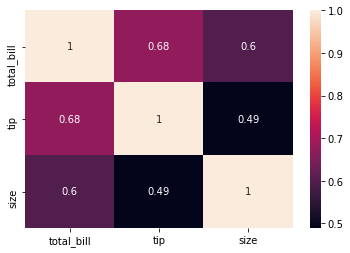

In [26]:
sns.heatmap ( df.corr() , annot=True )  ;

In [27]:
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


<a id='section_8'></a>
# 8. **Label Encode**

In [28]:
df ['LE 1']   =   df ['sex']  .map     ( {'Male':0, 'Female':1} )  

In [29]:
df ['LE 1']   =   df ['sex']  .replace ( {'Male':0, 'Female':1} )

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df ['LE 3']   =   le.fit_transform ( df ['sex'] )


In [31]:
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size,LE 1,LE 3
102,44.30,2.50,Female,Yes,Sat,Dinner,3,1,0
124,12.48,2.52,Female,No,Thur,Lunch,2,1,0
161,12.66,2.50,Male,No,Sun,Dinner,2,0,1
36,16.31,2.00,Male,No,Sat,Dinner,3,0,1


> Comments
* Encoded according to alphabetical order

<a id='section_9'></a>
# 9. **One-hot Encode**

In [32]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
LE 1            2
LE 3            2
dtype: int64

In [33]:
pd.get_dummies   ( df ,  drop_first =True )                                               # dummy for all cat cols

,total_bill,tip,size,LE 1,LE 3,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,0,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,1,0,0,1,1
4,24.59,3.61,4,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1,0,1
240,27.18,2.00,2,1,0,1,0,0,1,0,1
241,22.67,2.00,2,0,1,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1,0,1


In [34]:
pd.get_dummies   ( df ,  drop_first =True  ,  columns = ['sex','smoker','time','day'] ) 

,total_bill,tip,size,LE 1,LE 3,sex_Female,smoker_No,time_Dinner,day_Fri,day_Sat,day_Sun
0,16.99,1.01,2,1,0,1,1,1,0,0,1
1,10.34,1.66,3,0,1,0,1,1,0,0,1
2,21.01,3.50,3,0,1,0,1,1,0,0,1
3,23.68,3.31,2,0,1,0,1,1,0,0,1
4,24.59,3.61,4,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,1,0,1,0
240,27.18,2.00,2,1,0,1,0,1,0,1,0
241,22.67,2.00,2,0,1,0,0,1,0,1,0
242,17.82,1.75,2,0,1,0,1,1,0,1,0


<a id='section_10'></a>
# 10. **Scaling**

**Z-scale**

In [35]:
from scipy.stats import zscore

df ['Z']   =   zscore ( df ['total_bill'] ) 

**Standard scale**

In [36]:
from sklearn.preprocessing import StandardScaler

ss  =  StandardScaler()

df ['SS']  =  ss.fit_transform  ( df [['total_bill']] )

**Min Max scale**

In [37]:
from sklearn.preprocessing import MinMaxScaler

mm  =  MinMaxScaler()

df ['MM']  =  mm.fit_transform  ( df [['total_bill']] )

**Results**

In [38]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,LE 1,LE 3,Z,SS,MM
146,18.64,1.36,Female,No,Thur,Lunch,3,1,0,-0.128987,-0.128987,0.326142
70,12.02,1.97,Male,No,Sat,Dinner,2,0,1,-0.874135,-0.874135,0.187474
12,15.42,1.57,Male,No,Sun,Dinner,2,0,1,-0.491431,-0.491431,0.258693
14,14.83,3.02,Female,No,Sun,Dinner,2,1,0,-0.557841,-0.557841,0.246334
58,11.24,1.76,Male,Yes,Sat,Dinner,2,0,1,-0.961931,-0.961931,0.171135


> Comments
    
        * * Skew & Kurt ... unchanged
        * In MM scaling , min = 0 , max = 1

<a id='section_11'></a>
# 11. **Transformation**

In [39]:
df  =  sns.load_dataset ('tips')

In [40]:
df ['T 1']         =   np.sqrt      ( df['total_bill'] )

df ['T 2']         =   np.log       ( df['total_bill'] )

df ['T 3']  , lmb  =   stats.boxcox ( df['total_bill'] )                       # lmb - lambda param 


In [41]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,T 1,T 2,T 3
8,15.04,1.96,Male,No,Sun,Dinner,2,3.878144,2.710713,3.014022
116,29.93,5.07,Male,No,Sun,Dinner,4,5.470832,3.398861,3.884543
142,41.19,5.00,Male,No,Thur,Lunch,5,6.417944,3.718196,4.304429
216,28.15,3.00,Male,Yes,Sat,Dinner,5,5.305657,3.337547,3.805097
69,15.01,2.09,Male,Yes,Sat,Dinner,2,3.874274,2.708717,3.011563


<a id='section_12'></a>
# 12. **Graphical Analysis**

## **Uni-variate**

> Quantitative

        * Kernel Density plot
        * Histogram
        * Box plot
        * Violin plot

> Categorical 

        * Bar chart
        * Pie chart

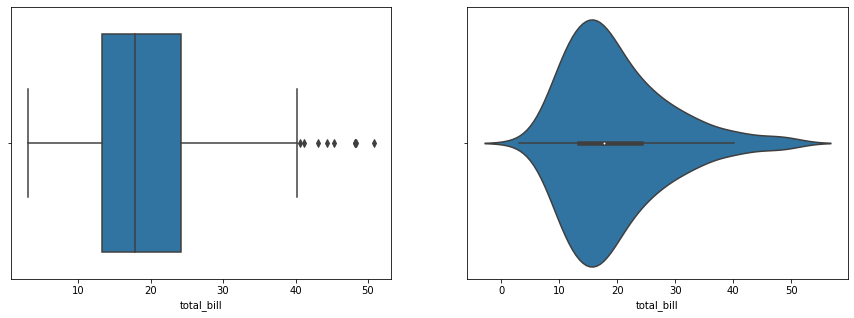

In [42]:
fig , pos  =  plt.subplots (1,2,  figsize=(15,5))

sns.boxplot    ( df ['total_bill'],          ax=pos[0] )
sns.violinplot ( df ['total_bill'],          ax=pos[1] )      
 

## **Bi-variate**

* Num vs. Num
    * Scatterplot
    * Line plot
   <br><br>
    
* Num vs Cat
    * Bar chart (on summary statistics)
    * Grouped kernel density plots
    * Box plots
    * Violin plots
    <br><br>
* Cat vs. Cat
    * Stacked bar chart
    * Grouped bar chart
    * Segmented bar chart

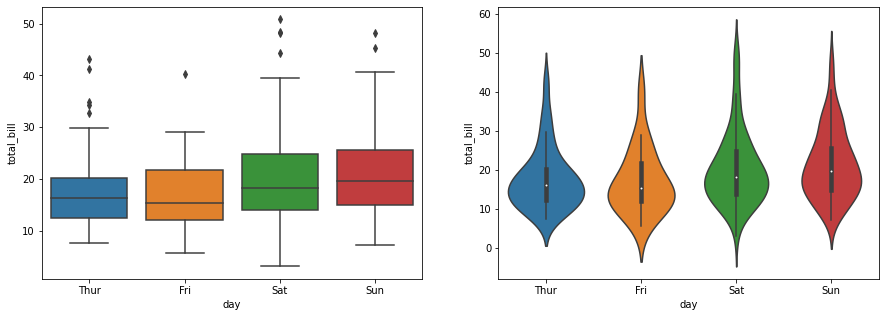

In [43]:
fig , pos  =   plt.subplots (1,2,  figsize=(15,5))

sns.boxplot    ( x='day' , y='total_bill', data=df, ax=pos[0] )
sns.violinplot ( x='day' , y='total_bill', data=df, ax=pos[1] )


### **Multi-variate**

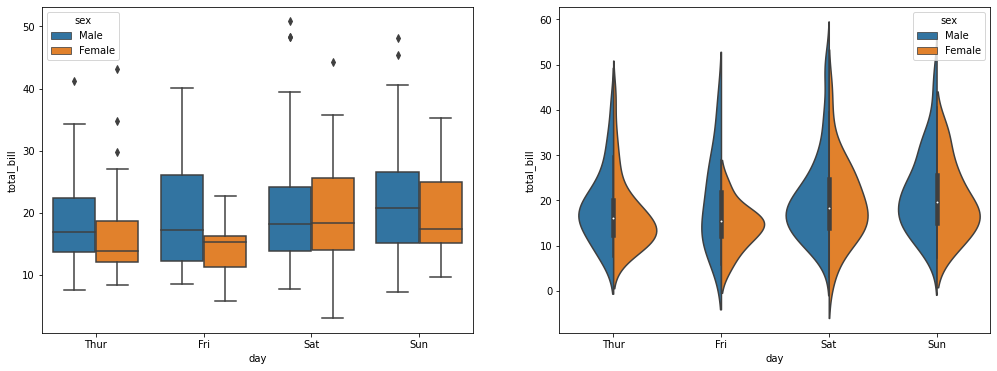

In [44]:
fig , pos  =  plt.subplots (1,2,  figsize=(17,6))

sns.boxplot    ( x='day',y='total_bill', hue='sex', data=df, ax=pos[0] )
sns.violinplot ( x='day',y='total_bill', hue='sex', data=df, ax=pos[1] , split=True )


<a id='section_13'></a>
# 13. **Outliers**

4 methods :
* Boxplot
* Quantile
* Z-score
* IQR

In [45]:
df  =  sns.load_dataset ('tips')

### **Method 1 : Boxplot**

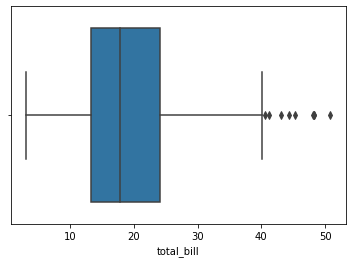

In [46]:
sns.boxplot  ( df ['total_bill'] ) ;                                     

In [47]:
df ['B']   =   df['total_bill']     [ df['total_bill'] < 40 ]                    #  selecting required portion

### **Method 2 : Quantile**

In [48]:
df ['total_bill'].quantile (0.95)

38.061

In [49]:
df ['Q']   =   df['total_bill']     [ df['total_bill'] < 38.06 ]                 #  selecting required portion

### **Method 3 : Z-score**

In [50]:
from scipy import stats                                                 

z  =  np.abs ( stats.zscore (df_num) )

np.where (z > 3)                                                                 #  finding out outliers

(array([ 23,  59, 125, 141, 143, 156, 156, 170, 170, 212, 212], dtype=int64),
 array([1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 1], dtype=int64))

### OR

In [51]:
from scipy.stats import zscore

df ['Z']  =  zscore ( df['total_bill'] )

In [52]:
df1  =   df   [ ( df['Z']>-3 )  &  ( df['Z']<3 ) ]                               #  selecting required portion

---

### **Method 4 : IQR**

In [53]:
q1  =  df ['total_bill'].quantile(0.25)
q3  =  df ['total_bill'].quantile(0.75)

iqr =  q3-q1

UL  =  q3 + 1.5*iqr
LL  =  q1 - 1.5*iqr

In [54]:
df2  =   df   [ (df['total_bill'] > LL)  &  (df['total_bill'] < UL)  ]             #  selecting required portion

---

> Comments
    
        * Outlier removal leads to
            - Skew decrease
            - Kurt decrease
            
        * In above 
            - Z-score removes 4
            - IQR removes 9
            - Hence IQR preferable
  
        
        * Domain-related factor 
            - whether to remove more outliers / less outliers